## Preparación del Conjunto de Datos
En esta sección, preparamos el conjunto de datos y definimos las secuencias de aminoácidos que analizaremos. Este proceso generará embeddings, lo cual puede llevar unos minutos.

Primero, seleccionamos las secuencias de interés. Luego, creamos los conjuntos de datos de entrenamiento y prueba, y preparamos los cargadores de datos para el entrenamiento y evaluación del modelo.


In [1]:
path_dataset_folder = "../DATASETS/"

In [2]:
import pandas as pd

df = pd.read_csv(f'{path_dataset_folder}predictor_dataset.csv')
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1261
Number of columns: 17


In [3]:
import numpy as np

# Load the embedded dataset and attention weights
prott5_embeddings = np.load(f"{path_dataset_folder}prott5_embeddings.npy", allow_pickle=True).item()
prott5_attention_weights = np.load(f"{path_dataset_folder}prott5_attention_layers.npy", allow_pickle=True).item()

print(f"prott5_embeddings_dict keys: {prott5_embeddings.keys()}")
print(f"prott5_attention_weights_dict keys: {prott5_attention_weights.keys()}")

# Transform the embeddings dictionary
prott5_embeddings_dict = {id_: emb for id_, emb in zip(prott5_embeddings['UniProt IDs'], prott5_embeddings['embeddings'])}

# Transform the attention weights dictionary
prott5_attention_weights_dict = {id_: attn for id_, attn in zip(prott5_attention_weights['UniProt IDs'], prott5_attention_weights['attention_layers'])}

# Print the transformed dictionaries to verify
print(f"Transformed prott5_embeddings keys: {list(prott5_embeddings_dict.keys())[:5]}")  # Print first 5 keys for brevity
print(f"Transformed prott5_attention_weights keys: {list(prott5_attention_weights_dict.keys())[:5]}")  # Print first 5 keys for brevity

prott5_embeddings_dict keys: dict_keys(['UniProt IDs', 'embeddings'])
prott5_attention_weights_dict keys: dict_keys(['UniProt IDs', 'attention_layers'])
Transformed prott5_embeddings keys: ['Q9Y2X8', 'Q05086', 'Q9Y6X0', 'Q8BH75', 'Q04120']
Transformed prott5_attention_weights keys: ['Q9Y2X8', 'Q05086', 'Q9Y6X0', 'Q8BH75', 'Q04120']


In [4]:
import importlib
from ProteinDataset import ProteinDataset

# Create an instance of ProteinDataset
protein_dataset = ProteinDataset(df,
                                 embeddings=prott5_embeddings_dict, 
                                 attention_weights=prott5_attention_weights_dict, 
                                 solve_inconsitence=True)

Checking consistency...
Number of duplicates: 12
Use the remove_duplicates function to remove duplicates.
Removing duplicates...
Removed 12 duplicates.
Solving inconsistency...
Consistency checked.
ProteinDataset Report:
Number of samples: 1219
Number of embeddings: 1219
Number of attention weights: 1219
Target column: Class
ID column: UniProt IDs
Save path: ./OUTPUTS/


In [ ]:
# Exploring attention weights, finding the protein with the most attention layers
max_attention_layers = 0
max_attention_protein = None
min_attention_layers = 100000000000000
min_attention_protein = None
for key in prott5_attention_weights_dict.keys():
    if len(prott5_attention_weights_dict[key]) > max_attention_layers:
        max_attention_layers = len(prott5_attention_weights_dict[key])
        max_attention_protein = key
    if len(prott5_attention_weights_dict[key]) < min_attention_layers:
        min_attention_layers = len(prott5_attention_weights_dict[key])
        min_attention_protein = key


Attention weights for Q9Y2X8: (877, 877)
Attention weights for Q05086: (877, 877)
Attention weights for Q9Y6X0: (1598, 1598)
Attention weights for Q8BH75: (723, 723)
Attention weights for Q04120: (723, 723)


In [6]:
df.columns

Index(['UniProt IDs', 'PDB ID', 'Gene Name', 'Protein Name',
       'Amino Acid Sequence', 'Organism Name', 'Status', 'Protein Existence',
       'GO BP Terms', 'GO CC Terms', 'GO MF Terms', 'Max_MBL_CC',
       'CC_Pairs_Max_MBL', 'Max_MBL_MF', 'MF_Pairs_Max_MBL', 'Highest_MBL',
       'Class'],
      dtype='object')

Data shape: (1219, 1024)


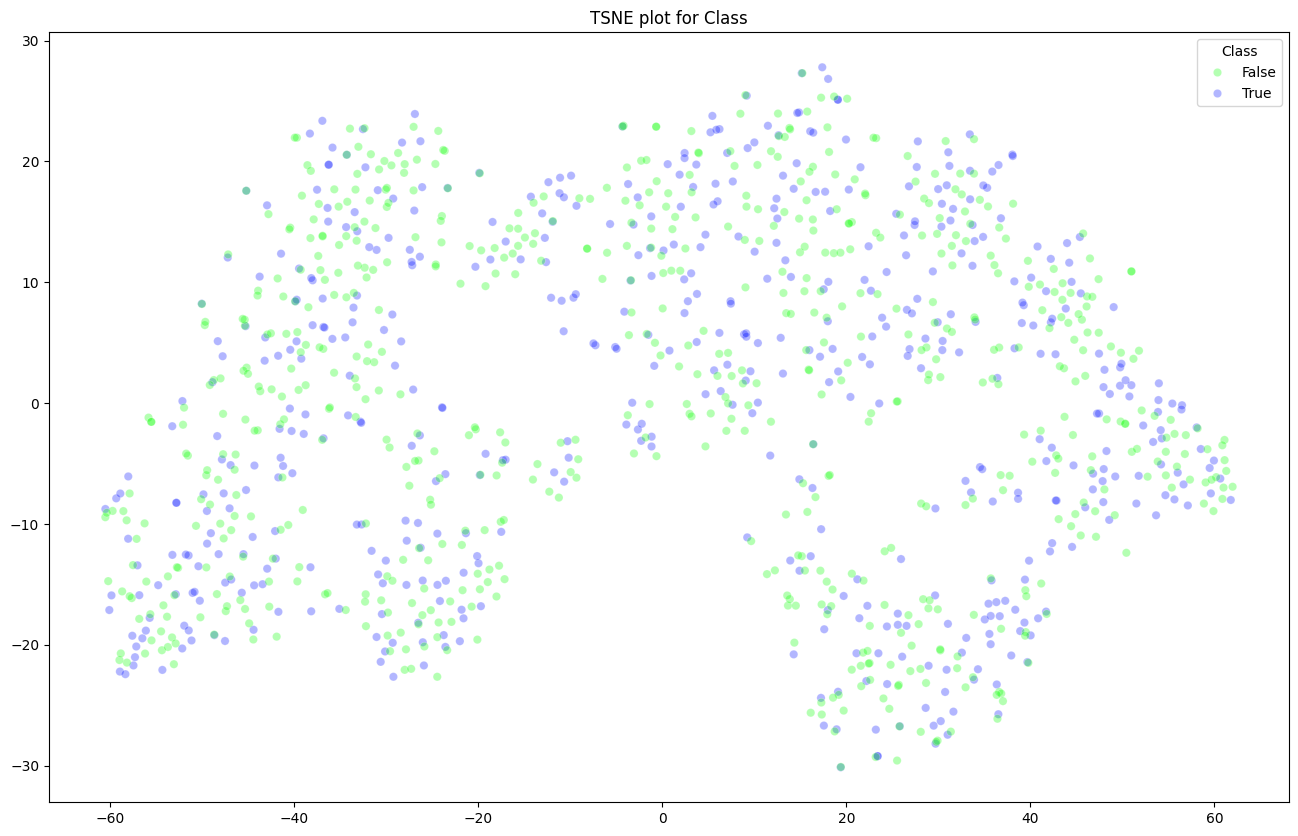

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1219,) + inhomogeneous part.

In [7]:
# Plot TSNE for embeddings
protein_dataset.plot_tsne(attribute='Class', combined=False)

# Plot TSNE for combined embeddings and attention weights
protein_dataset.plot_tsne(attribute='Class', combined=True)

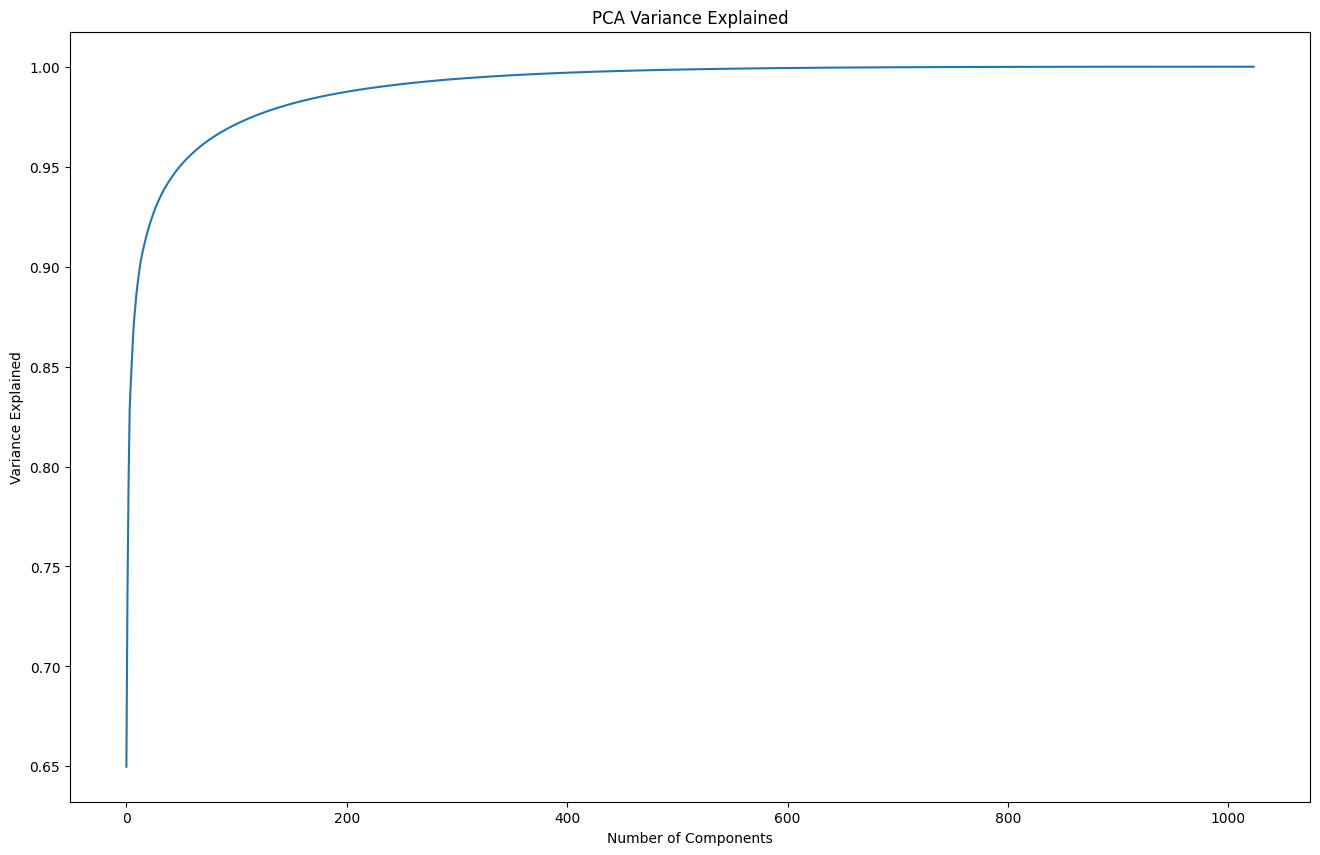

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1219,) + inhomogeneous part.

In [ ]:
# Plot PCA variance explained for embeddings
protein_dataset.plot_pca_variance(combined=False)
protein_dataset.plot_pca_variance(combined=True)

In [ ]:
# Plot k-means clustering for embeddings
protein_dataset.plot_kmeans(n_clusters=3, combined=False)

TypeError: list indices must be integers or slices, not tuple

<Figure size 1600x1000 with 0 Axes>